<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/PSD_USA_ROTINAS_out_05_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 2.5MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 280 (delta 11), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (280/280), 77.76 MiB | 43.34 MiB/s, done.
Resolving deltas: 100% (134/134), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 280 (delta 11), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (280/280), 77.76 MiB | 42.15 MiB/s, done.
Resolving deltas: 100% (134/134), done.


In [8]:
!git clone https://github.com/ucfilho/marquesgabi_set_2020
%cd marquesgabi_set_2020

Cloning into 'marquesgabi_set_2020'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 258 (delta 39), reused 0 (delta 0), pack-reused 194
Receiving objects: 100% (258/258), 6.99 MiB | 29.33 MiB/s, done.
Resolving deltas: 100% (157/157), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020


In [9]:
from big_segment import Segmenta  # got image provided segmented
from ANN_FIND_GRAIN import AnnGrain  # got image provided segmented
from psd_mahotas import Mahotas

In [10]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
ANN_dat=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [ANN_dat, df_new]
  ANN_dat= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 280 (delta 11), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (280/280), 77.76 MiB | 42.95 MiB/s, done.
Resolving deltas: 100% (134/134), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/Doutorado


In [11]:
df=Segmenta(img)


In [12]:
print(df)

    Width           0           1  ...         781         782         783
0     131   67.338089   60.149586  ...    1.037003    1.000000    1.213740
1     166   78.377121   76.204964  ...    6.749455    6.710262    6.765423
2     190   98.577827  101.078659  ...   83.149582   86.107697   83.618164
3     143   92.653175   91.570976  ...  119.925034  120.148415  120.515274
4     105  100.826675  103.671127  ...   92.648895   92.848892   95.142235
..    ...         ...         ...  ...         ...         ...         ...
45    172  140.882095  157.129807  ...   63.301788   66.087074   66.549492
46    165   72.107658   72.197800  ...   13.765106    1.809036    0.936235
47    196   97.571426   97.877548  ...    3.102041    1.653061    1.122449
48    139   77.294136   78.015625  ...   46.723717   25.087570    1.623260
49    164   72.045807   69.750748  ...  104.733490  101.179657  110.085663

[150 rows x 785 columns]


In [13]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 5.5862 - accuracy: 0.4490
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9001 - accuracy: 0.4927
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0685 - accuracy: 0.4956
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2567 - accuracy: 0.4869
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2140 - accuracy: 0.4956
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9530 - accuracy: 0.5977
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 1.7549 - accuracy: 0.4956
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 2.3660 - accuracy: 0.4956
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 1.5961 - accuracy: 0.4956
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.6385
Epoch 11/

In [14]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 14.1634 - accuracy: 0.4461 
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 2.0585 - accuracy: 0.4956
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 1.1720 - accuracy: 0.5539
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 2.2725 - accuracy: 0.4956
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 2.5245 - accuracy: 0.4956
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 1.9093 - accuracy: 0.4956
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0136 - accuracy: 0.4985
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.7318
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7063 - accuracy: 0.4985
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.5394
Epoch 1

In [15]:
#print(confusion_matrix)

In [16]:
#print(METRICS)

In [17]:
#print(y_pred.ravel())

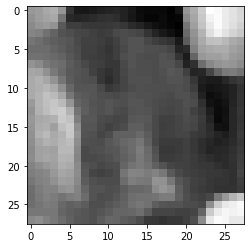

In [18]:
Size=28
qual_img=8
data=np.array(df.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")

In [19]:
Escolha=['ASM', 'constrast', 'correl', 'variance', 'inv diff mom', 'sum aveg', 
         'sum var', 'sum entropy', 'entropy', 'dif var', 'dif entropy', 
         'IMC1', 'IMC2']

Prop=Escolha[1] 

In [20]:
Width_All=df['Width']
df=df.drop('Width',axis=1)
#df_mahotas=Mahotas(Prop,df,Width_All)
Features_Total=Mahotas(Prop,df,Width_All)
print(Features_Total)

     N_peaks  Media_proem          Area  ...       Mode        Mean          Sd
0          2    11.301563    413.541146  ...   1.662500   19.632161   26.749528
1          1   622.800000  13597.590885  ...  17.228125  611.256120  586.294595
2          4    99.423958   6560.534375  ...  64.140625  277.882161  187.199037
3          2    42.981250   4351.188802  ...  87.406250  194.624089   85.722157
4          3     7.923264    330.699219  ...   2.518750   14.422005    6.671040
..       ...          ...           ...  ...        ...         ...         ...
145        4   103.838542   6651.816146  ...  16.253125  287.358333  385.693353
146        2    27.702604    697.925781  ...   3.115625   29.403906   35.074462
147        3   127.045139   7338.142969  ...  69.309375  312.321745  241.998631
148        2    21.027083   2718.958333  ...  14.112500  139.957422  287.341467
149        1    93.405208   2061.280208  ...   1.843750   88.552474   99.700530

[150 rows x 10 columns]
